##### Top 25 pandas tricks

#### Table of contents
1. Show installed versions
2. Create an example DataFrame
3. Rename columns
4. Reverse row order
5. Reverse column order
6. Select columns by data type
7. Convert strings to numbers
8. Reduce DataFrame size
9. Build a DataFrame from multiple files (row-wise)
10. Build a DataFrame from multiple files (column-wise)
11. Create a DataFrame from the clipboard
12. Split a DataFrame into two random subsets
13. Filter a DataFrame by multiple categories
14. Filter a DataFrame by largest categories
15. Handle missing values
16. Split a string into multiple columns
17. Expand a Series of lists into a DataFrame
18. Aggregate by multiple functions
19. Combine the output of an aggregation with a DataFrame
20. Select a slice of rows and columns
21. Reshape a MultiIndexed Series
22. Create a pivot table
23. Convert continuous data into categorical data
24. Change display options
25. Style a DataFrame
###### Load example datasets

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/content/drive/MyDrive/dataset/ipl.csv')
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


#### 1. Show installed versions

In [3]:
pd.__version__

'1.1.5'

In [4]:
pd.show_versions()

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)



INSTALLED VERSIONS
------------------
commit           : b5958ee1999e9aead1938c0bba2b674378807b3d
python           : 3.6.9.final.0
python-bits      : 64
OS               : Linux
OS-release       : 4.19.112+
Version          : #1 SMP Thu Jul 23 08:00:38 PDT 2020
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.1.5
numpy            : 1.19.4
pytz             : 2018.9
dateutil         : 2.8.1
pip              : 19.3.1
setuptools       : 51.1.1
Cython           : 0.29.21
pytest           : 3.6.4
hypothesis       : None
sphinx           : 1.8.5
blosc            : None
feather          : 0.4.1
xlsxwriter       : None
lxml.etree       : 4.2.6
html5lib         : 1.0.1
pymysql          : None
psycopg2         : 2.7.6.1 (dt dec pq3 ext lo64)
jinja2           : 2.11.2
IPython          : 5.5.0
pandas_datareader: 0.9.0
bs4              : 4.6.3
bottleneck       : 1

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

##### EDA

In [6]:
df.shape

(76014, 15)

In [7]:
df.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [8]:
## count the number of missing value in each columns
df.isna().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

### 2. sort by the number

In [9]:
df.sort_values('batsman').tail()
df.sort_values('date').tail()
df.sort_values('venue').tail()
df.sort_values('bat_team').tail()
df.sort_values('bowler').tail()


,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
74834,608,10-05-2017,Green Park,Gujarat Lions,Delhi Daredevils,Ishan Kishan,Z Khan,39,1,4.6,35,1,26,1,195
74833,608,10-05-2017,Green Park,Gujarat Lions,Delhi Daredevils,Ishan Kishan,Z Khan,38,1,4.5,38,1,25,1,195
74832,608,10-05-2017,Green Park,Gujarat Lions,Delhi Daredevils,Ishan Kishan,Z Khan,34,1,4.4,34,1,21,1,195
74830,608,10-05-2017,Green Park,Gujarat Lions,Delhi Daredevils,Ishan Kishan,Z Khan,33,1,4.2,33,1,21,1,195
1988,17,30-04-2008,Feroz Shah Kotla,Delhi Daredevils,Royal Challengers Bangalore,G Gambhir,Z Khan,5,0,1.3,5,0,3,2,191


# Visualize the distribution

In [10]:
# plt.bar(df['runs'],df['wickets_last_5'])
# plt.title('Bar Graph')
# plt.xlabel('runs')
# plt.ylabel('wickets_last_5_over')
# plt.show()

Text(0.5, 1.0, 'Histogram')

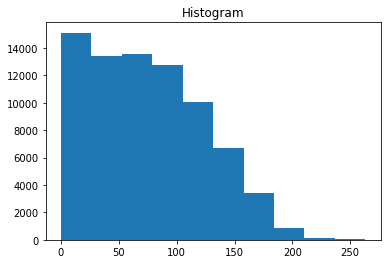

In [11]:
# Histogram
plt.hist(df['runs'],bins=10)
plt.title('Histogram')


Text(0.5, 1.0, 'Histogram')

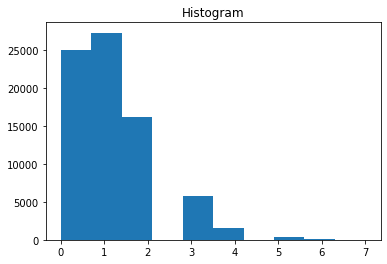

In [12]:
# Histogram
plt.hist(df['wickets_last_5'],bins=10)
plt.title('Histogram')


In [13]:
 import seaborn as sns


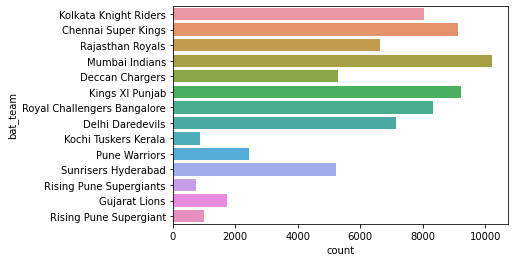

In [14]:
# count plot
sns.countplot(y=df['bat_team'],data=df)

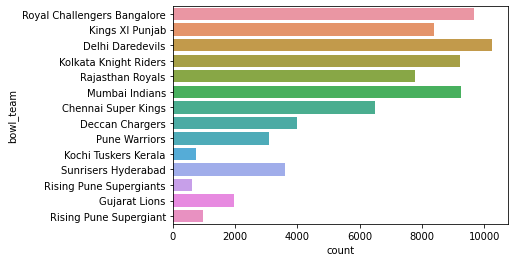

In [15]:
## bowl_team 
sns.countplot(y=df['bowl_team'],data=df)


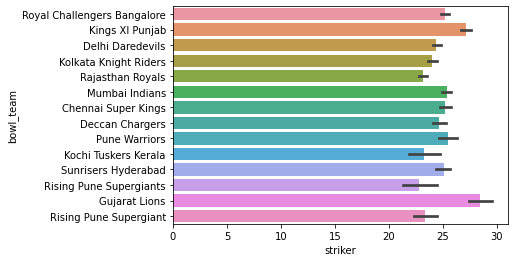

In [16]:
sns.barplot(x=df['striker'],y=df['bowl_team'],data=df)

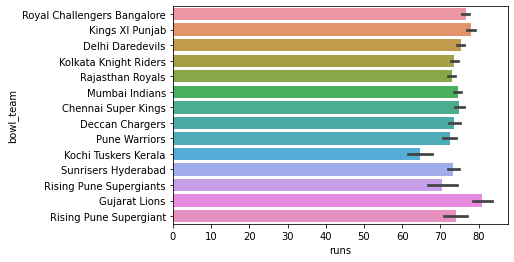

In [17]:
sns.barplot(x=df['runs'],y=df['bowl_team'],data=df)


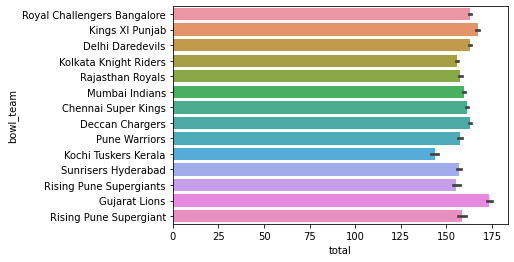

In [18]:
sns.barplot(x=df['total'],y=df['bowl_team'],data=df)


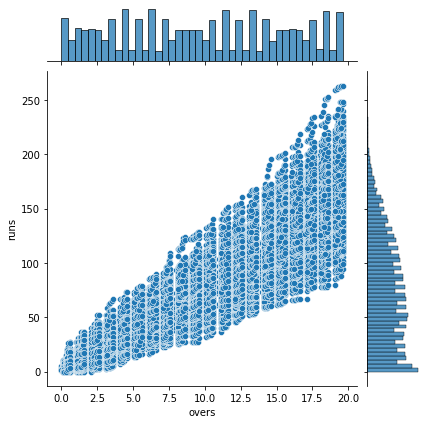

In [19]:
# this will tell about run based on overs
sns.jointplot(y=df['runs'],x=df['overs'],data=df,kind='scatter')



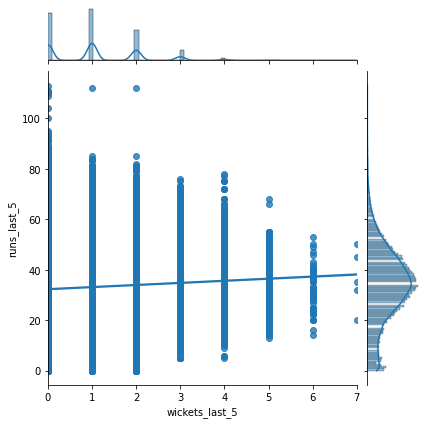

In [21]:
sns.jointplot(y=df['runs_last_5'],x=df['wickets_last_5'],data=df,kind='reg')


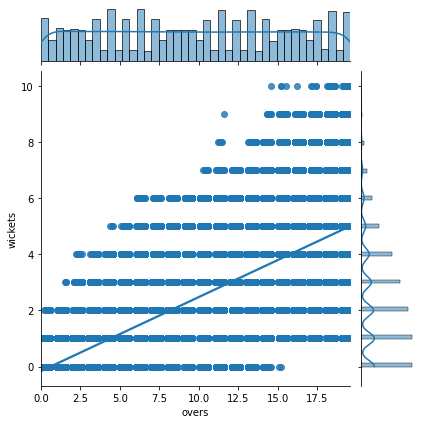

In [22]:
sns.jointplot(y=df['wickets'],x=df['overs'],data=df,kind='reg')


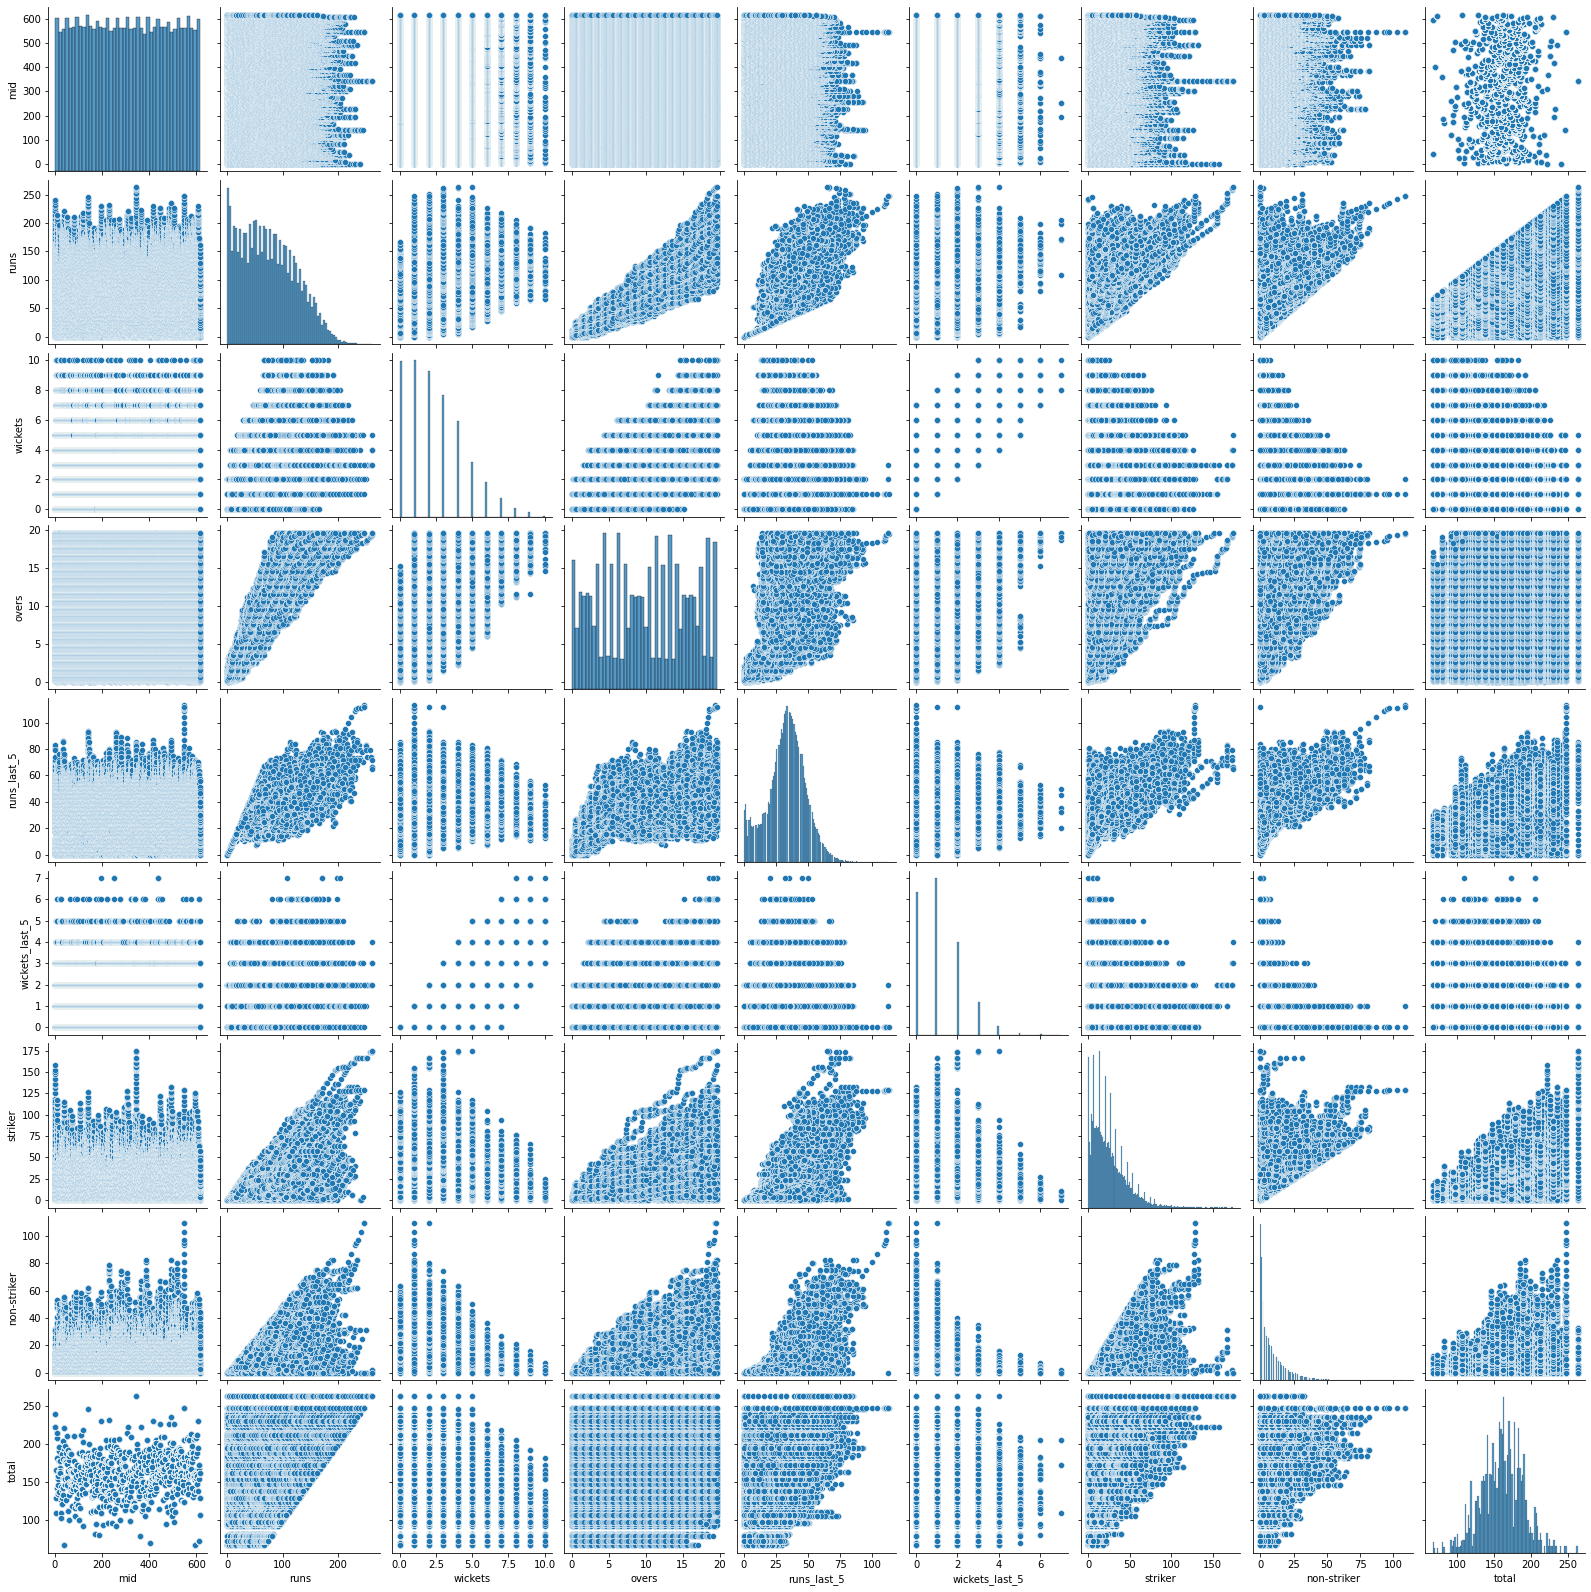

In [23]:
sns.pairplot(df)

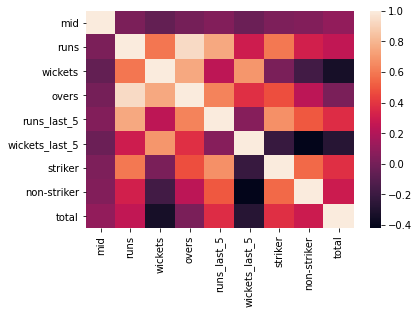

In [26]:
sns.heatmap(df.corr())

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


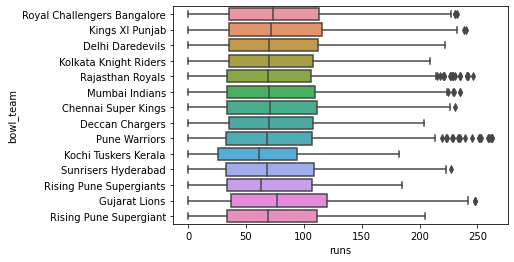

In [30]:
# Box 
sns.boxplot('runs','bowl_team',data=df)

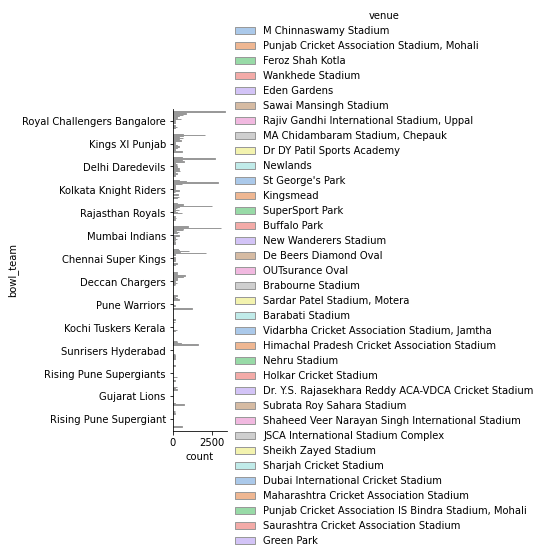

In [39]:
sns.catplot(y="bowl_team", hue="venue", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)
